# Feature analysis
Let's first see the importance of the different features before any computation.

Text(0, 0.5, 'Feature')

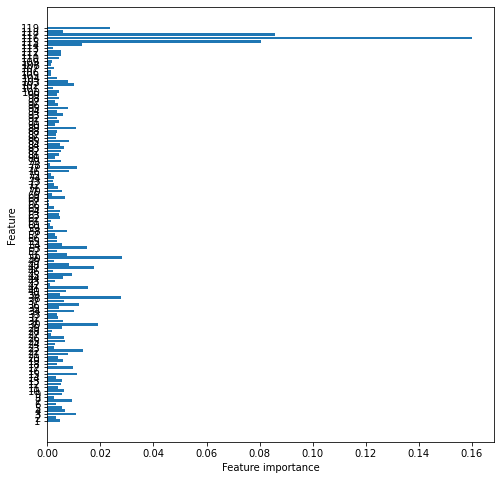

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import sys
sys.path.append('../../utils')
from utils import feature_selection

gt = pd.read_csv('../../../dumps/references/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = GradientBoostingClassifier(n_estimators=10,max_depth=10,min_samples_leaf=5,random_state=0) 
tree.fit(data_train, target_train)
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Here we can see that all features have an impact on the decision but a few of them seem to have way more importance. Let's see what we get from selecting the best features for different dataset sizes.

0.15
(1196, 119)
(1196, 33)
0.3
(2393, 119)
(2393, 33)
10
0.44999999999999996
(3589, 119)
(3589, 32)
7
0.6
(4786, 119)
(4786, 27)
6
0.75
(5982, 119)
(5982, 26)
5
0.9
(7179, 119)
(7179, 23)
4


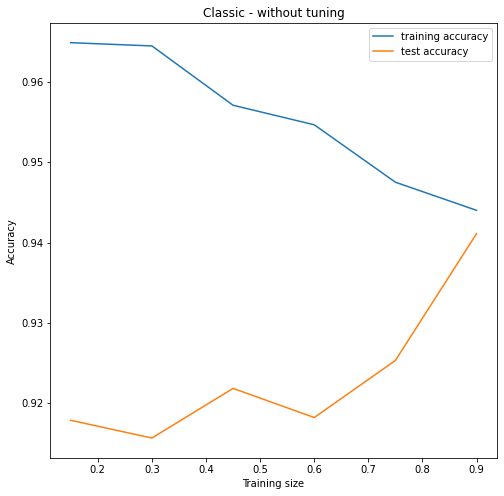

Training max value : 0.9648829431438127
Test max value : 0.9411027568922306


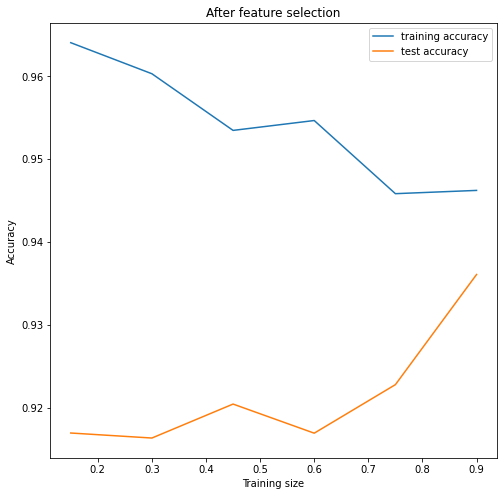

Training max value : 0.9640468227424749
Test max value : 0.9360902255639098


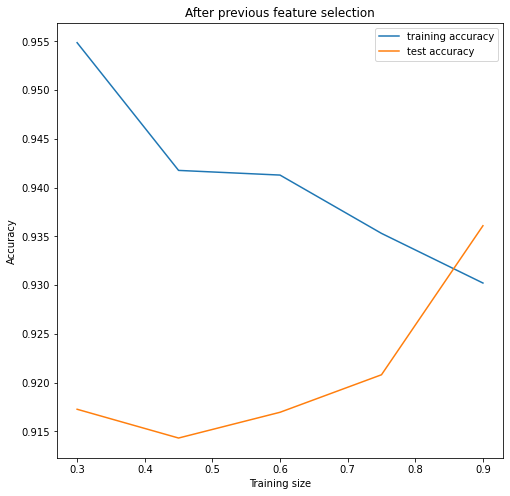

Training max value : 0.9548683660676974
Test max value : 0.9360902255639098


In [3]:
feature_selection('../../../dumps/references/2020.02.10-12.14.csv', 0.15, "gradient")

The performances for the two first situations are quite similar even though a bit better for the first one in general. We can therefore conclude that in this case it's better to keep all the features, since even the last case provides slighlty worse results.

What happens when applying the same procedure on a bigger dataset of around 14K samples ?

0.15
(2205, 119)
(2205, 9)
0.3
(4410, 119)
(4410, 10)
5
0.44999999999999996
(6616, 119)
(6616, 17)
5
0.6
(8821, 119)
(8821, 11)
1
0.75
(11027, 119)
(11027, 13)
1
0.9
(13232, 119)
(13232, 11)
1


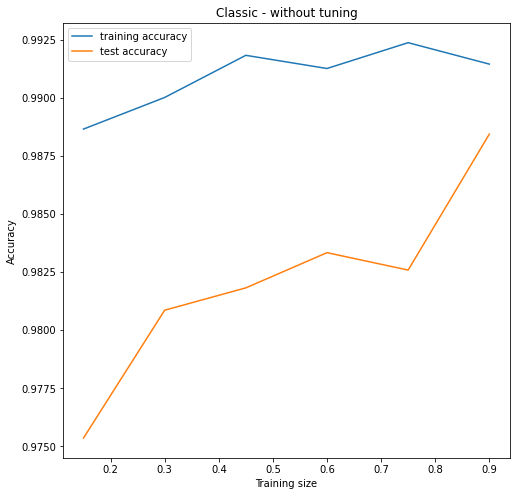

Training max value : 0.9923823342704271
Test max value : 0.9884432358939497


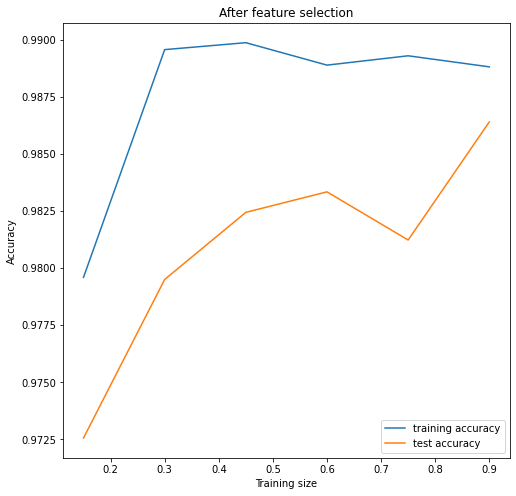

Training max value : 0.9898730350665055
Test max value : 0.9864038069340585


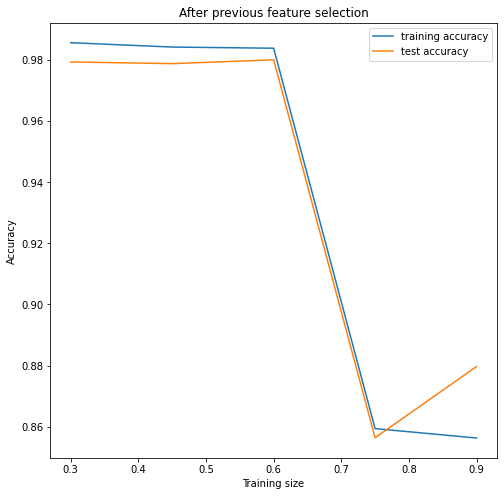

Training max value : 0.9857142857142858
Test max value : 0.9801088065283917


In [4]:
feature_selection('../../../dumps/references/2020.03.11-17.39.csv',0.15,"gradient")

Except that the number of common features is smaller than with the Random Forests, the results are quite similar : a general improvement of around 4-5% and a huge (and bigger) drop in the case of the feature intersection.